In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pickle
def load_pickle(fname): 
    with open(fname, 'rb') as f: return pickle.load(f)

In [3]:
import tempfile
from open_spiel.python.examples.pysats import run_sats, map_generators
from open_spiel.python.games.clock_auction_base import action_to_bundles 
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/gregdeon/plots/main/style.mplstyle')

PID_TO_STYLE = {
    0: 'solid',
    1: 'dotted'
}

def visualize_values(config):
    with tempfile.NamedTemporaryFile(mode='w+', delete=False) as fp:
        sats_config = run_sats(config, fp.name, seed=config['sats_seed'])

    bundles = action_to_bundles(config['auction_params']['licenses'])
    auction_map, encumberance = map_generators[config['map']]
    spectrum_per_license = np.array(encumberance).reshape(-1, 1)
    bandwidths = (bundles @ spectrum_per_license).flatten()
    idx = np.argsort(bandwidths)

    for player_id in range(len(sats_config['players'])):
        for type_id in range(len(sats_config['players'][player_id]['type'])):
            values = np.array(sats_config['players'][player_id]['type'][type_id]['value']) #- 12 * bandwidths[idx] # You aren't paying less than this
            
            plt.plot(bandwidths[idx], values[idx], label=f'Player {player_id} Type {type_id}', linestyle=PID_TO_STYLE[player_id])
            plt.scatter(bandwidths[idx], values[idx], s=4, clip_on=False)
    plt.legend()
    plt.xlabel('Number of Licenses')
    plt.ylabel('Value')
    plt.xlim(0, None)
    plt.ylim(0, None)
    # plt.axhline(12*4*.6*1.05*1.05)
    plt.show()
    

## jan12 (agrees on first 3 seeds)

In [7]:
!python sample_games.py --n_configs 5 --licenses 1 4 --action_prefix 3 3 --min_mccfr_iters 100 --seed 1234 --output configs/jan12_repro.pkl

Sampling games with args: {'n_configs': 5, 'map_name': 'BCEncumbered', 'licenses': [1, 4], 'action_prefix': [3, 3], 'clock_increment': 0.05, 'max_rounds': 15, 'heuristic_deviations': 1000, 'min_types': 3, 'max_types': 3, 'min_bidders': 2, 'max_bidders': 2, 'min_value_per_subscriber': 20, 'max_value_per_subscriber': 35, 'min_market_share': 0.35, 'max_market_share': 0.5, 'z_spread': 0.1, 'max_straightforward_rounds': 20, 'max_straightforward_rounds_alternating': 25, 'min_mccfr_iters': 100, 'use_external_mccfr': True, 'seed': 1234, 'output': 'configs/jan12_repro.pkl', 'delete_if_exists': False, 'report_interval': 30}
Prefix bids:
 [[0 3]
 [0 3]]
Accepted 0.00000%: : 37it [00:08,  3.49it/s]MCCFR: speed of 125.32 iters/s
SUCCESS                                     
{'scale': 1000000, 'auction_params': {'increment': 0.05, 'max_rounds': 15, 'heuristic_deviations': 1000, 'agent_memory': 15, 'licenses': [1, 4], 'opening_price': [12, 7], 'activity': [12, 7]}, 'bidders': [{'player': 0, 'types': [

In [8]:
original_seeds = [870414972, 226683104, 536566236, 720663555, 499961888]
    
with open('configs/jan12_repro.pkl', 'rb') as f:
    configs_repro = pickle.load(f)
   
print(f"Original seeds:   {original_seeds}")
print(f"Reproduced seeds: {[c['sats_seed'] for c in configs_repro]}")

Original seeds:   [870414972, 226683104, 536566236, 720663555, 499961888]
Reproduced seeds: [870414972, 226683104, 536566236, 887086973, 246543539]


## jan19_boring

In [4]:
!python sample_games.py --n_configs 5 --map_name BCEncumbered40 --licenses 2 4 --action_prefix 10 10 --min_mccfr_iters 100 --seed 1234 --min_market_share 0.3 --max_market_share 0.45 --output configs/jan19_boring.pkl --delete_if_exists

/global/scratch/newmanne/anaconda3NEW/envs/py38/lib/python3.8/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 6050). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
Sampling games with args: {'n_configs': 5, 'map_name': 'BCEncumbered40', 'licenses': [2, 4], 'action_prefix': [10, 10], 'clock_increment': 0.05, 'max_rounds': 15, 'heuristic_deviations': 1000, 'min_types': 3, 'max_types': 3, 'min_bidders': 2, 'max_bidders': 2, 'min_value_per_subscriber': 20, 'max_value_per_subscriber': 35, 'min_market_share': 0.3, 'max_market_share': 0.45, 'z_spread': 0.1, 'max_straightforward_rounds': 20, '

## jan12, varying types

In [6]:
!python sample_games.py --n_configs 5 --licenses 1 4 --action_prefix 3 3 --min_mccfr_iters 100 --seed 1234 --output configs/jan12_repro_4t.pkl --min_types 4 --max_types 4

/global/scratch/newmanne/anaconda3NEW/envs/py38/lib/python3.8/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 6050). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
Sampling games with args: {'n_configs': 5, 'map_name': 'BCEncumbered', 'licenses': [1, 4], 'action_prefix': [3, 3], 'clock_increment': 0.05, 'max_rounds': 15, 'heuristic_deviations': 1000, 'min_types': 4, 'max_types': 4, 'min_bidders': 2, 'max_bidders': 2, 'min_value_per_subscriber': 20, 'max_value_per_subscriber': 35, 'min_market_share': 0.35, 'max_market_share': 0.5, 'z_spread': 0.1, 'max_straightforward_rounds': 20, 'max_

In [9]:
!python write_configs.py --sats_fnames /global/scratch/open_spiel/open_spiel/notebooks/greg/configs/jan12_repro_4t.pkl --prefix jan12_repro_4t

Loaded 5 samples.
Created 20 modified configs for 5 base games.
Running SATS...
100%|█████████████████████████████████████████████| 5/5 [00:20<00:00,  4.11s/it]
All done, goodbye!


In [ ]:
python /apps/open_spiel/notebooks/greg/sample_games.py --n_configs 5 --licenses 1 4 --action_prefix 3 3 --min_mccfr_iters 100 --seed 1234 --output configs/jan12_repro_1t.pkl --min_types 1 --max_types 1

# Plots

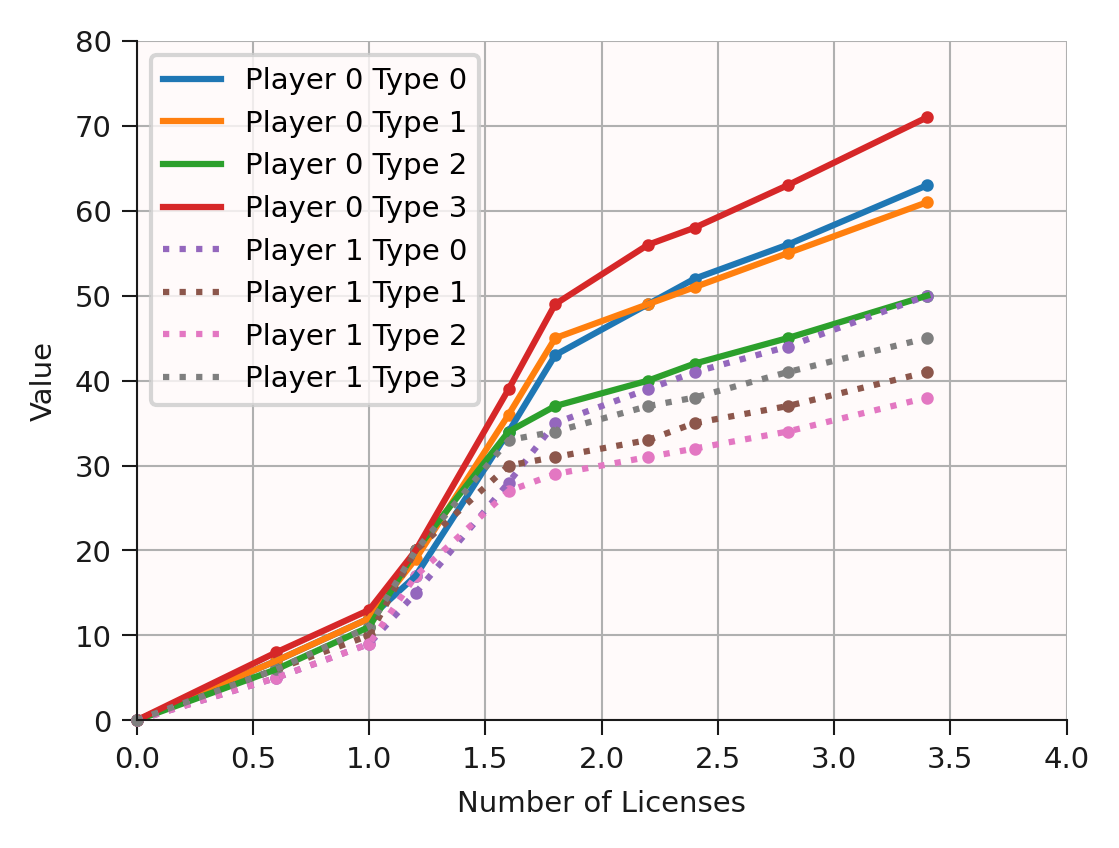

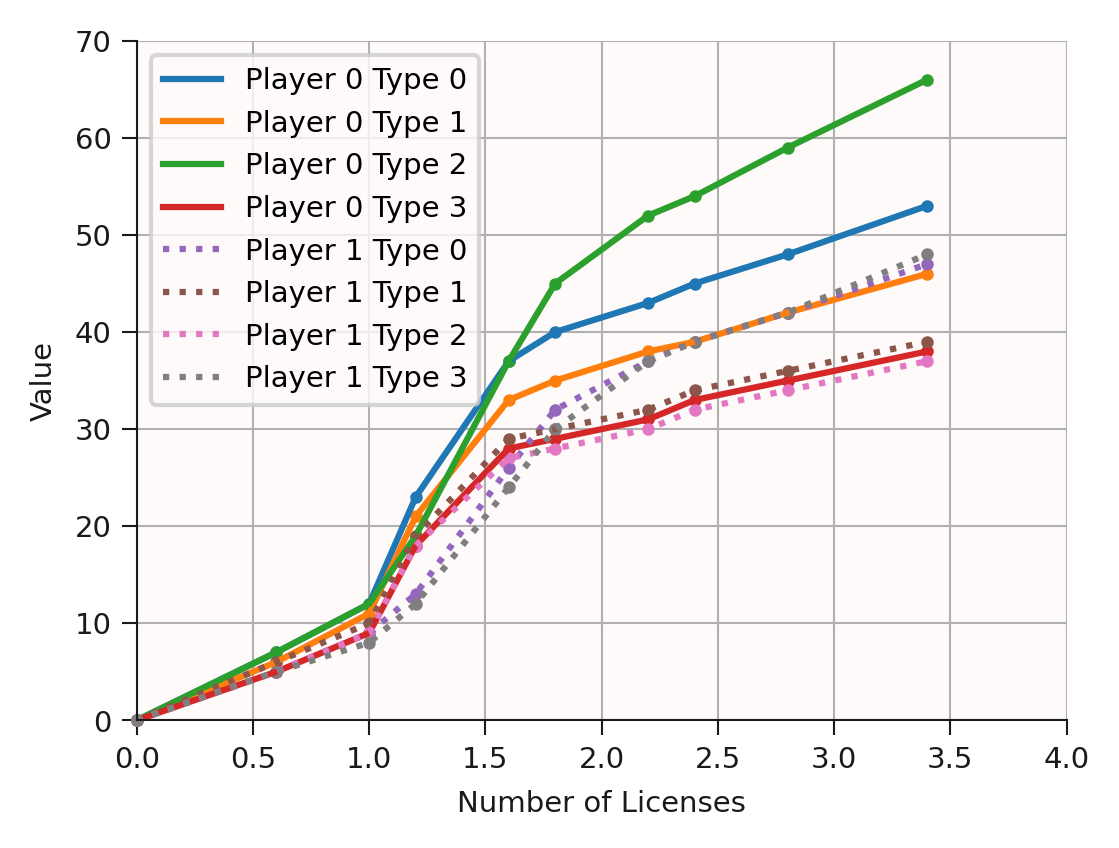

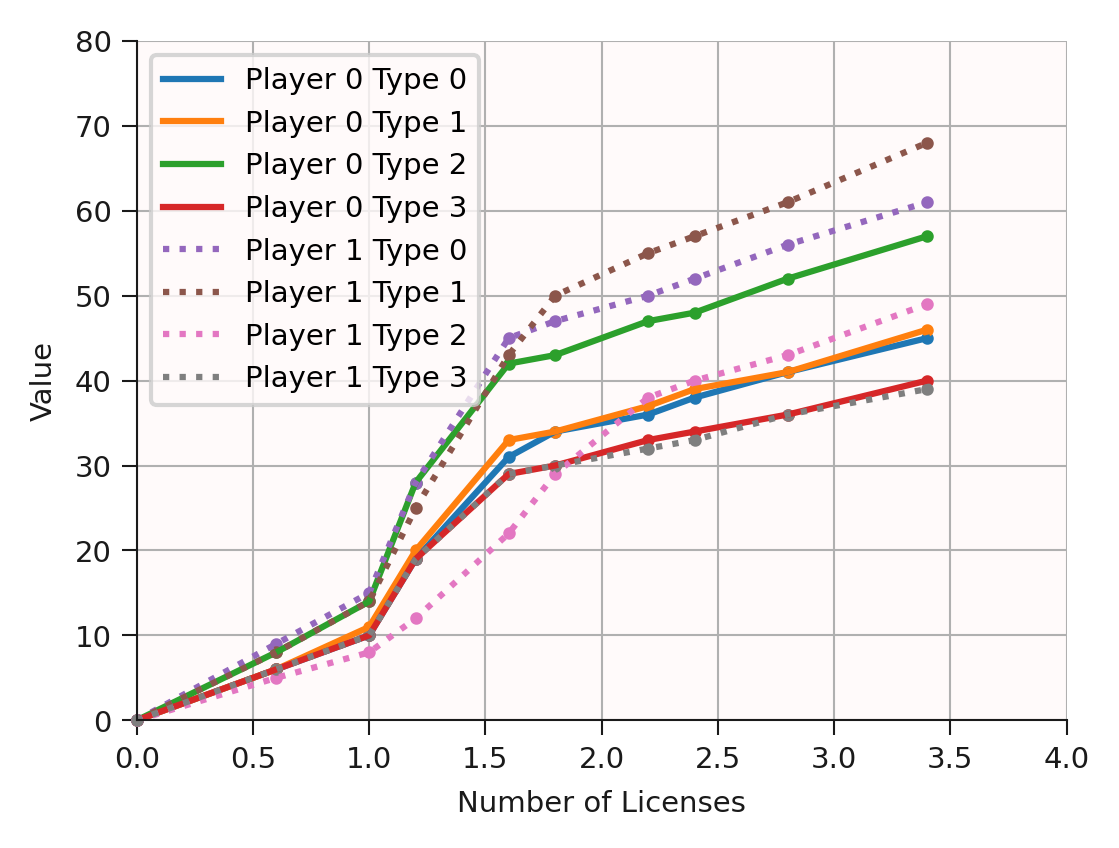

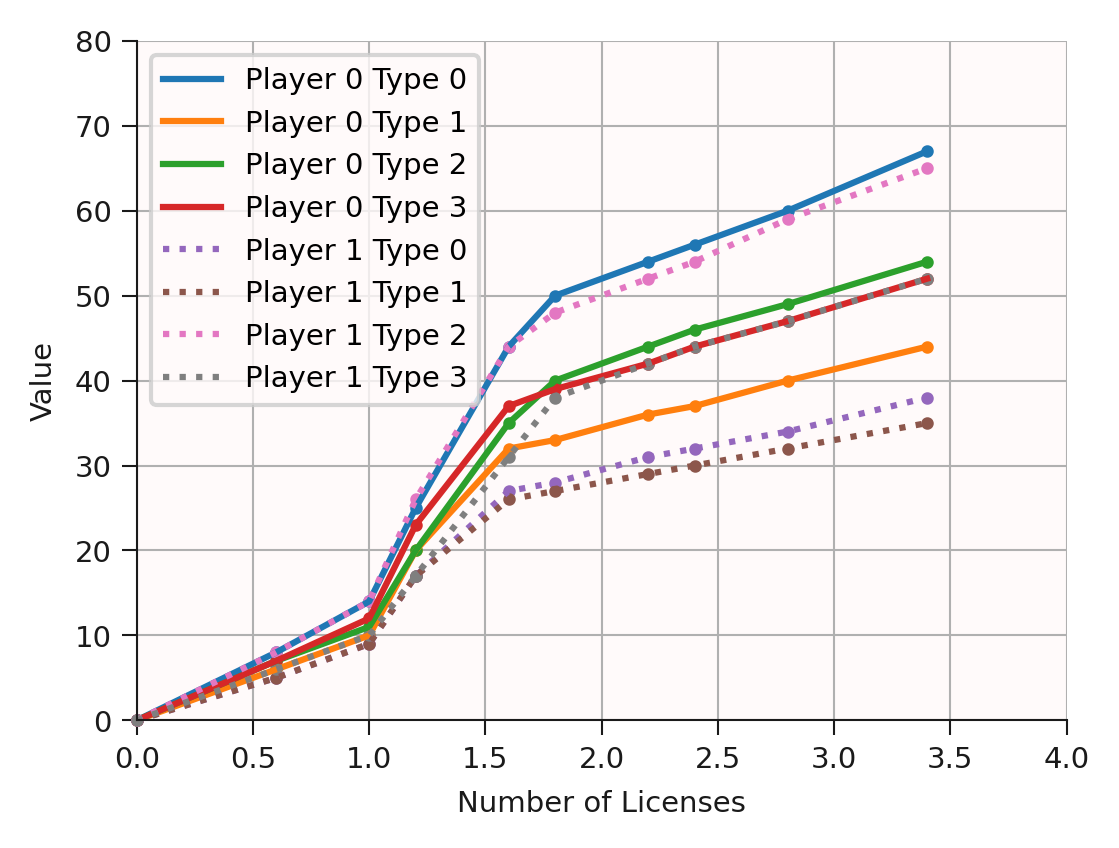

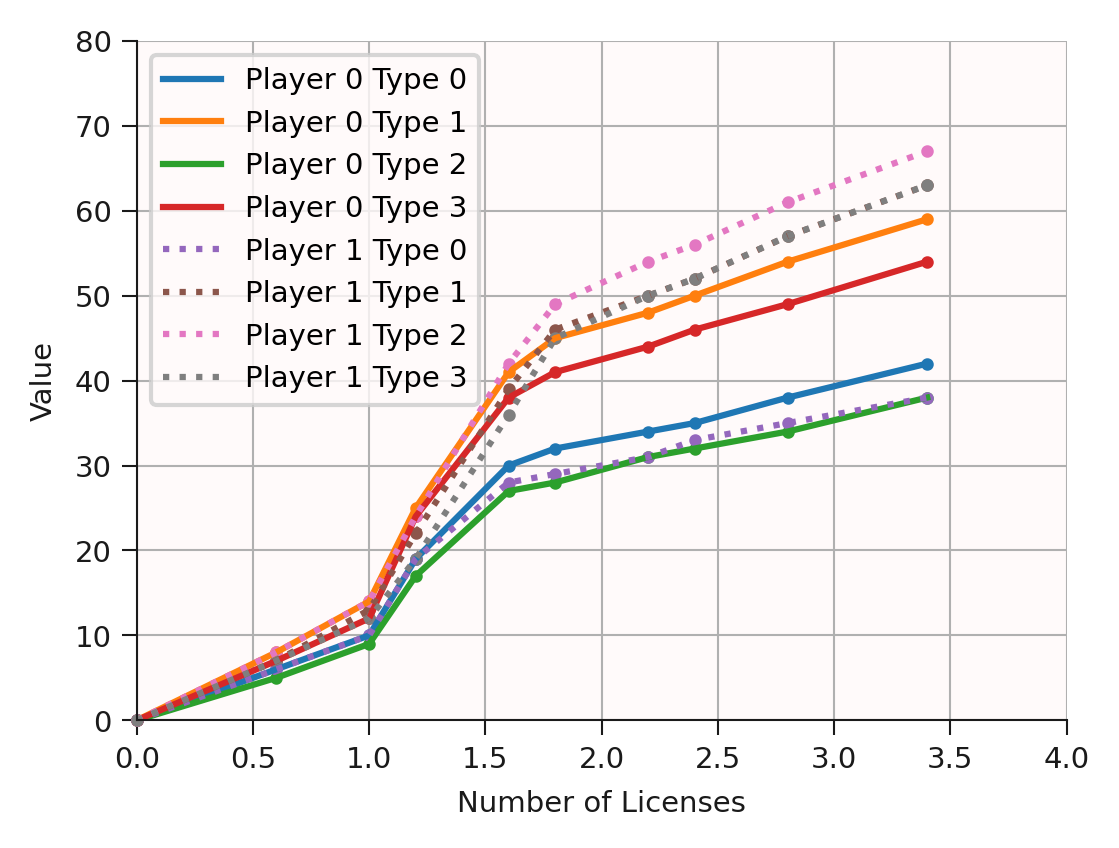

In [14]:
configs = load_pickle('configs/jan12_repro_4t.pkl')
for config in configs:
    visualize_values(config)